In [3]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [4]:
books = pd.read_csv(r".\Input\books.csv")
books_tags = pd.read_csv(r".\Input\book_tags.csv")
ratings = pd.read_csv(r".\Input\ratings.csv") # Usuarios que calificaron libros
tags = pd.read_csv(r".\Input\tags.csv")
to_read = pd.read_csv(r".\Input\to_read.csv") # Usuarios que marcaron libros como "quiero leer" (DESCARTADO PARA EL MODELO)


In [5]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Paso 1: Crear la matriz de utilidad (libros como filas, usuarios como columnas)
matriz_utilidad = ratings.pivot_table(index='book_id', columns='user_id', values='rating')
matriz_utilidad.fillna(0, inplace=True)

# Paso 2: Convertir a matriz dispersa (más eficiente)
matriz_sparse = csr_matrix(matriz_utilidad.values)

# Paso 3: Crear y entrenar el modelo KNN
modelo_knn = NearestNeighbors(metric='cosine', algorithm='brute')
modelo_knn.fit(matriz_sparse)

# Paso 4: Función para recomendar libros similares
def recomendar_libros(book_id, n_recomendaciones=5):
    try:
        # Obtener índice interno del libro en la matriz
        idx = list(matriz_utilidad.index).index(book_id)
        
        # Buscar libros más cercanos
        distancias, indices = modelo_knn.kneighbors([matriz_utilidad.iloc[idx]], n_neighbors=n_recomendaciones + 1)
        
        print(f"\n📘 Libro base: {books[books['book_id'] == book_id]['title'].values[0]}")
        print("\n📚 Libros recomendados:\n")
        
        for i in range(1, len(indices.flatten())):
            libro_id = matriz_utilidad.index[indices.flatten()[i]]
            titulo = books[books['book_id'] == libro_id]['title'].values[0]
            autor = books[books['book_id'] == libro_id]['authors'].values[0]
            print(f"→ {titulo} – {autor}")
    
    except ValueError:
        print("⚠️ El book_id no existe en la matriz de utilidad.")

# Ejemplo: recomendar libros similares a un book_id concreto
recomendar_libros(book_id=1)  # Cambiá el ID según quieras



📘 Libro base: The Hunger Games (The Hunger Games, #1)

📚 Libros recomendados:

→ Catching Fire (The Hunger Games, #2) – Suzanne Collins
→ Mockingjay (The Hunger Games, #3) – Suzanne Collins
→ Harry Potter and the Sorcerer's Stone (Harry Potter, #1) – J.K. Rowling, Mary GrandPré
→ Twilight (Twilight, #1) – Stephenie Meyer
→ Divergent (Divergent, #1) – Veronica Roth


In [9]:
books["book_id"].max()

np.int64(10000)

In [12]:
recomendar_libros(book_id=6)


📘 Libro base: The Fault in Our Stars

📚 Libros recomendados:

→ Divergent (Divergent, #1) – Veronica Roth
→ Looking for Alaska – John Green
→ Paper Towns – John Green
→ The Hunger Games (The Hunger Games, #1) – Suzanne Collins
→ Insurgent (Divergent, #2) – Veronica Roth


C:\Users\RX983GH\AppData\Local\Temp\ipykernel_21104\1816779353.py:13: UserWarning: Glyph 127899 (\N{CONTROL KNOBS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\RX983GH\OneDrive - EY\Desktop\Proyectos Data Analytics\PROYECTO LIBROS\BookBuddy-Sistema-de-Recomendacion-de-Libros\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127899 (\N{CONTROL KNOBS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


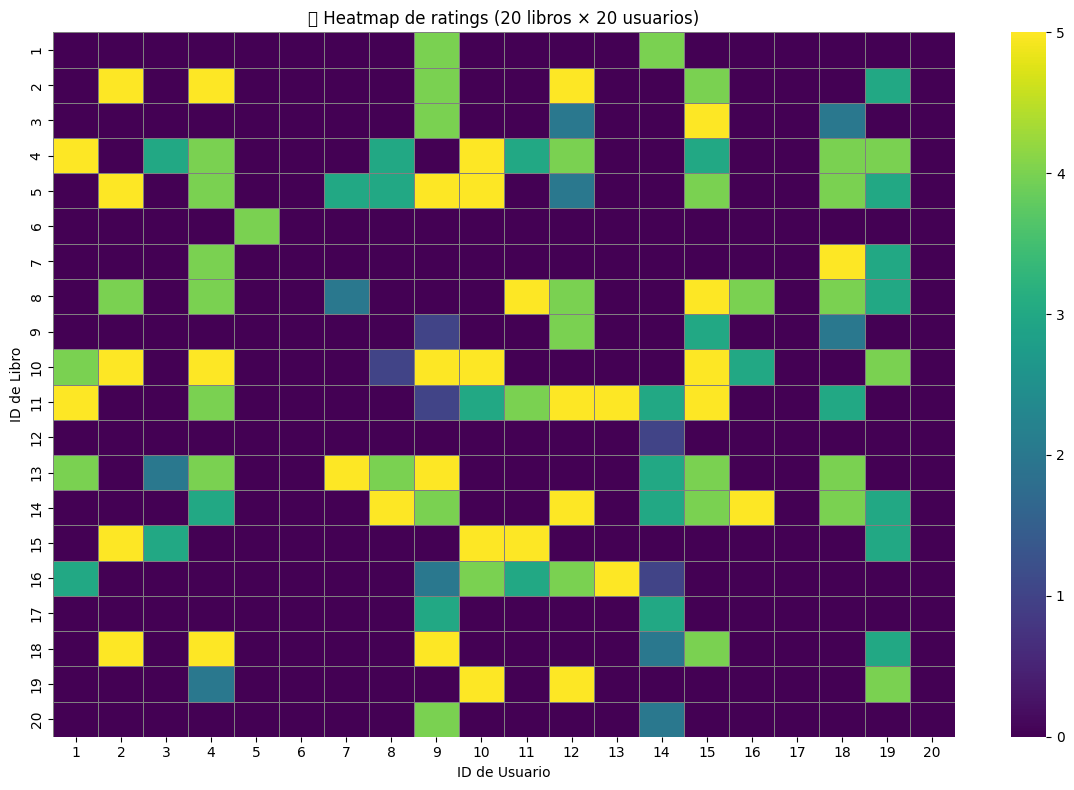

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Elegimos una muestra chica: los primeros 20 libros y 20 usuarios
matriz_sample = matriz_utilidad.iloc[:20, :20]

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_sample, cmap='viridis', cbar=True, linewidths=0.5, linecolor='gray')

plt.title("🎛️ Heatmap de ratings (20 libros × 20 usuarios)")
plt.xlabel("ID de Usuario")
plt.ylabel("ID de Libro")
plt.tight_layout()
plt.show()


C:\Users\RX983GH\AppData\Local\Temp\ipykernel_21104\2691832777.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\RX983GH\OneDrive - EY\Desktop\Proyectos Data Analytics\PROYECTO LIBROS\BookBuddy-Sistema-de-Recomendacion-de-Libros\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


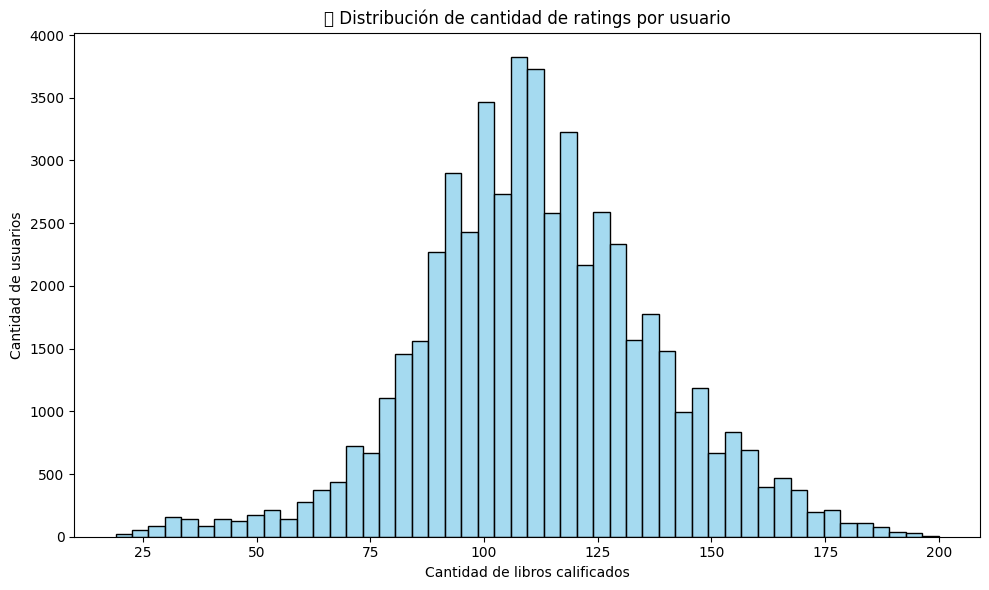

In [ ]:
# Contar cuántos libros calificó cada usuario
ratings_por_usuario = ratings.groupby("user_id")["rating"].count()

plt.figure(figsize=(10,6))
sns.histplot(ratings_por_usuario, bins=50, kde=False, color='skyblue')
plt.title("📈 Distribución de cantidad de ratings por usuario")
plt.xlabel("Cantidad de libros calificados")
plt.ylabel("Cantidad de usuarios")
plt.tight_layout()
plt.show()


In [ ]:
ratings_por_usuario = ratings.groupby("user_id")["rating"].count()
ratings_por_usuario = ratings_por_usuario.reset_index()
ratings_por_usuario.columns = ["Usuario", "Cantidad de ratings"]

In [ ]:
ratings_por_usuario = ratings.groupby("user_id")["rating"].count()
usuario_filtrado = ratings_por_usuario[(ratings_por_usuario< 100)]
ratings = ratings[~ratings["user_id"].isin(usuario_filtrado.index)]

In [94]:
ratings.value_counts("user_id")

user_id
24903    160
9783     160
36817    160
13743    160
15648    160
        ... 
48486    101
48468    101
34419    101
34338    101
15598    101
Name: count, Length: 34164, dtype: int64

C:\Users\RX983GH\AppData\Local\Temp\ipykernel_21104\2691832777.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\RX983GH\OneDrive - EY\Desktop\Proyectos Data Analytics\PROYECTO LIBROS\BookBuddy-Sistema-de-Recomendacion-de-Libros\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


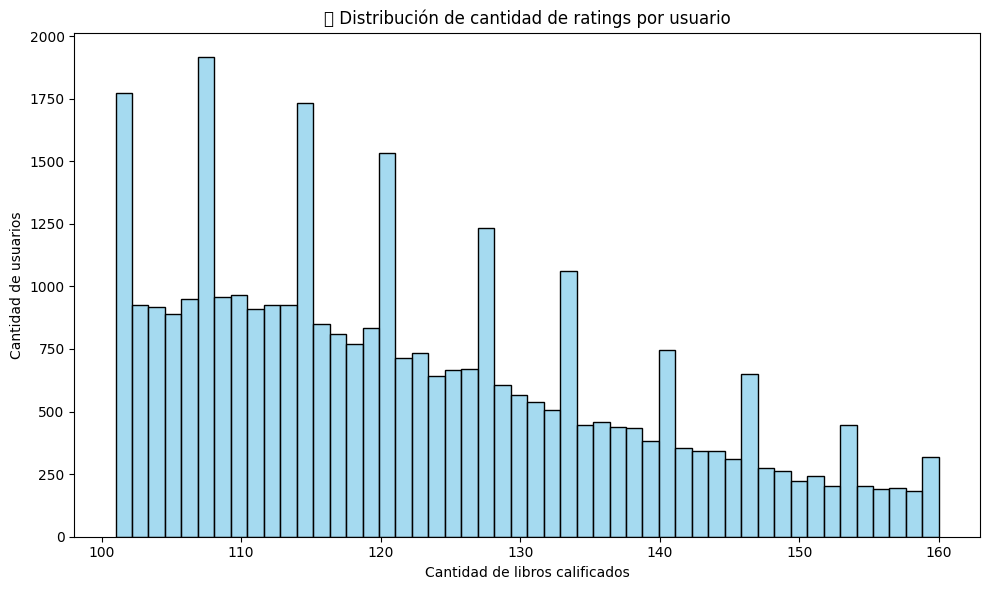

In [95]:
# Contar cuántos libros calificó cada usuario
ratings_por_usuario = ratings.groupby("user_id")["rating"].count()

plt.figure(figsize=(10,6))
sns.histplot(ratings_por_usuario, bins=50, kde=False, color='skyblue')
plt.title("📈 Distribución de cantidad de ratings por usuario")
plt.xlabel("Cantidad de libros calificados")
plt.ylabel("Cantidad de usuarios")
plt.tight_layout()
plt.show()


In [57]:
ratings_por_usuario["Cantidad de ratings"].max()

np.int64(200)

In [63]:
ratings_por_usuario.loc[ratings_por_usuario["Cantidad de ratings"] < 20]["Usuario"]

34589    34590
Name: Usuario, dtype: int64

In [62]:
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


C:\Users\RX983GH\AppData\Local\Temp\ipykernel_21104\1893976984.py:9: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\RX983GH\OneDrive - EY\Desktop\Proyectos Data Analytics\PROYECTO LIBROS\BookBuddy-Sistema-de-Recomendacion-de-Libros\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


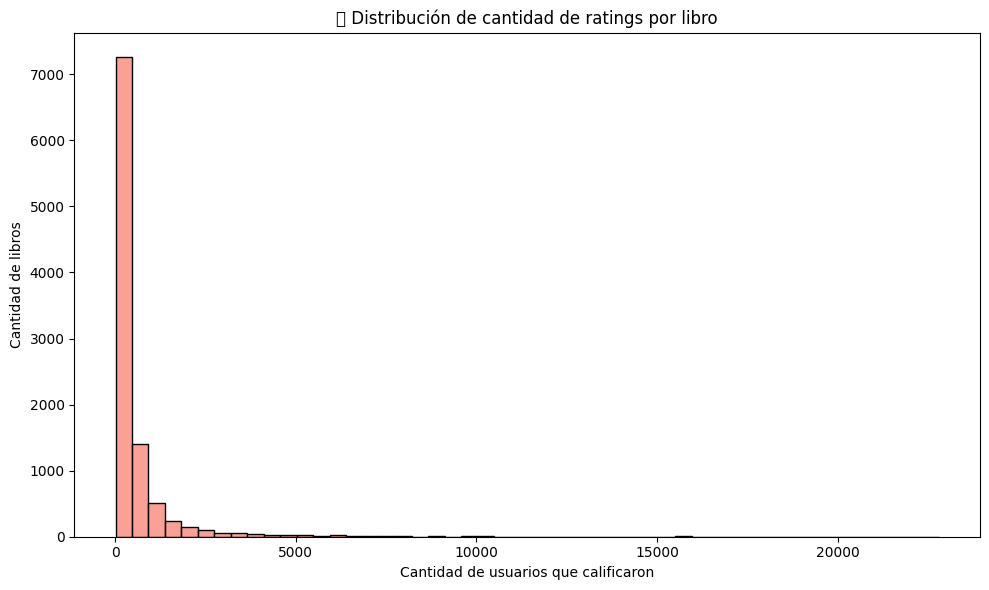

In [30]:
# Contar cuántos usuarios calificaron cada libro
ratings_por_libro = ratings.groupby("book_id")["rating"].count()

plt.figure(figsize=(10,6))
sns.histplot(ratings_por_libro, bins=50, kde=False, color='salmon')
plt.title("📚 Distribución de cantidad de ratings por libro")
plt.xlabel("Cantidad de usuarios que calificaron")
plt.ylabel("Cantidad de libros")
plt.tight_layout()
plt.show()


In [ ]:
ratings_por_libro.value_counts(ascending=True)

rating
11578     1
12105     1
8         1
45        1
10308     1
         ..
136      45
166      46
143      47
155      53
149      60
Name: count, Length: 1902, dtype: int64